In [209]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

# Задание 1

In [169]:
df = pd.read_csv("Electronic_sales_Sep2023-Sep2024.csv", sep=",")
df.head(10)

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
5,1004,41,Female,No,Smartphone,SKU1001,5,Completed,Credit Card,83.00,20.75,4,2024-05-26,Standard,"Impulse Item,Accessory",65.78
6,1005,25,Female,No,Smartwatch,SKU1003,3,Completed,Paypal,7603.47,844.83,9,2024-01-30,Overnight,NaN,0.00
7,1005,25,Female,No,Laptop,SKU1005,3,Completed,Debit Card,4175.64,463.96,9,2024-06-24,Overnight,"Extended Warranty,Extended Warranty",75.33
8,1006,24,Male,No,Smartphone,SKU1004,2,Cancelled,Debit Card,5538.33,791.19,7,2023-10-03,Standard,Impulse Item,43.05
9,1006,24,Male,Yes,Laptop,SKU1005,3,Completed,Cash,4175.64,463.96,9,2024-01-01,Express,NaN,0.00


In [170]:
#Предпочитаемый метод оплаты
condition = df['Payment Method'] == 'Paypal'
df.loc[condition, 'Payment Method'] = 'PayPal'



In [171]:
payment_method = df[['Customer ID', 'Payment Method']]
most_common_payment_method = (
     payment_method
    .groupby(['Customer ID', 'Payment Method'])
    .size()
    .reset_index(name='Count')
    .sort_values(by=['Customer ID', 'Count'], ascending=[True, False])
    .groupby('Customer ID')
    .first()
)
most_common_payment_method.head(15)

,Payment Method,Count
Customer ID,,
1000,Credit Card,1
1002,Cash,1
1003,Cash,1
1004,Credit Card,1
1005,Debit Card,1
1006,Cash,1
1007,Credit Card,1
1008,Cash,1
1011,Credit Card,1


In [184]:
#Общие траты
sum_total = df.groupby('Customer ID').agg({'Total Price': 'sum'})
df = sum_total.merge(df, on = 'Customer ID')
df

,Customer ID,Total Price_x,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price_y,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,6279.42,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,6279.42,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,5020.60,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,5020.60,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,41.50,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27296.78,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00
19996,19996,27296.78,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,NaN,0.00
19997,19996,27296.78,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98
19998,19997,2528.26,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34


In [185]:
#Количество денег, потраченных на дополнительные услуги и аксессуары
addons_sum = df.dropna(subset=['Add-ons Purchased'])
addons_sum = addons_sum.groupby('Customer ID').agg({'Add-on Total': 'sum'})
df = df.merge(addons_sum, on = 'Customer ID', how = 'inner')
df

,Customer ID,Total Price_x,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price_y,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total_x,Add-on Total_y
0,1000,6279.42,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21,66.30
1,1000,6279.42,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09,66.30
2,1002,5020.60,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00,60.16
3,1002,5020.60,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16,60.16
4,1003,41.50,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56,35.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17847,19996,27296.78,27,Female,No,Smartphone,SMP234,5,Completed,Credit Card,3419.04,1139.68,3,2024-04-20,Same Day,NaN,0.00,432.12
17848,19996,27296.78,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00,432.12
17849,19996,27296.78,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,NaN,0.00,432.12
17850,19996,27296.78,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98,432.12


# Задание 2

In [300]:
df = pd.read_csv("Electronic_sales_Sep2023-Sep2024.csv", sep=",")
df.head(10)

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
5,1004,41,Female,No,Smartphone,SKU1001,5,Completed,Credit Card,83.00,20.75,4,2024-05-26,Standard,"Impulse Item,Accessory",65.78
6,1005,25,Female,No,Smartwatch,SKU1003,3,Completed,Paypal,7603.47,844.83,9,2024-01-30,Overnight,NaN,0.00
7,1005,25,Female,No,Laptop,SKU1005,3,Completed,Debit Card,4175.64,463.96,9,2024-06-24,Overnight,"Extended Warranty,Extended Warranty",75.33
8,1006,24,Male,No,Smartphone,SKU1004,2,Cancelled,Debit Card,5538.33,791.19,7,2023-10-03,Standard,Impulse Item,43.05
9,1006,24,Male,Yes,Laptop,SKU1005,3,Completed,Cash,4175.64,463.96,9,2024-01-01,Express,NaN,0.00


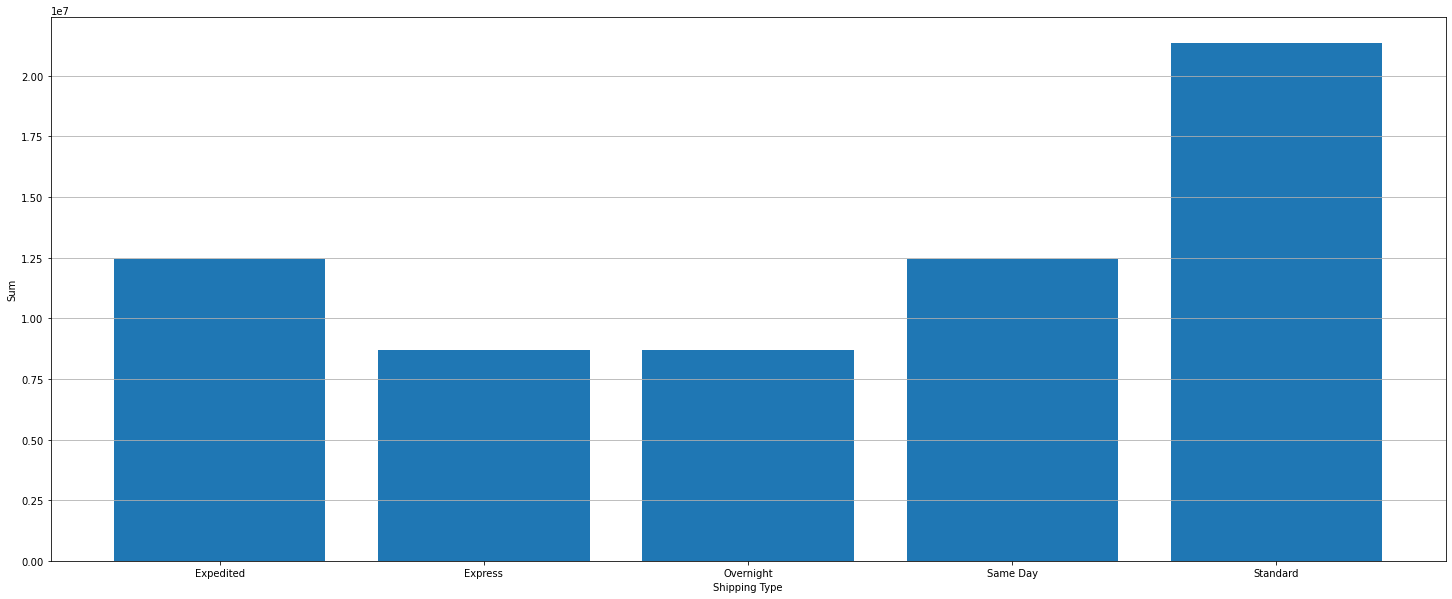

,Shipping Type,Total Price
0,Expedited,12437526.21
1,Express,8685215.62
2,Overnight,8704828.17
3,Same Day,12432024.82
4,Standard,21343073.55


In [301]:
#Доход по методу доставки
sum_total_shipping = df.groupby('Shipping Type').agg({'Total Price': 'sum'})
sum_total_shipping = sum_total_shipping.reset_index()

fig, ax = plt.subplots(figsize=(25,10))
ax.bar(sum_total_shipping['Shipping Type'],sum_total_shipping['Total Price'])
ax.grid(axis = 'y')
ax.set_xlabel('Shipping Type')
ax.set_ylabel('Sum')
plt.show()

sum_total_shipping

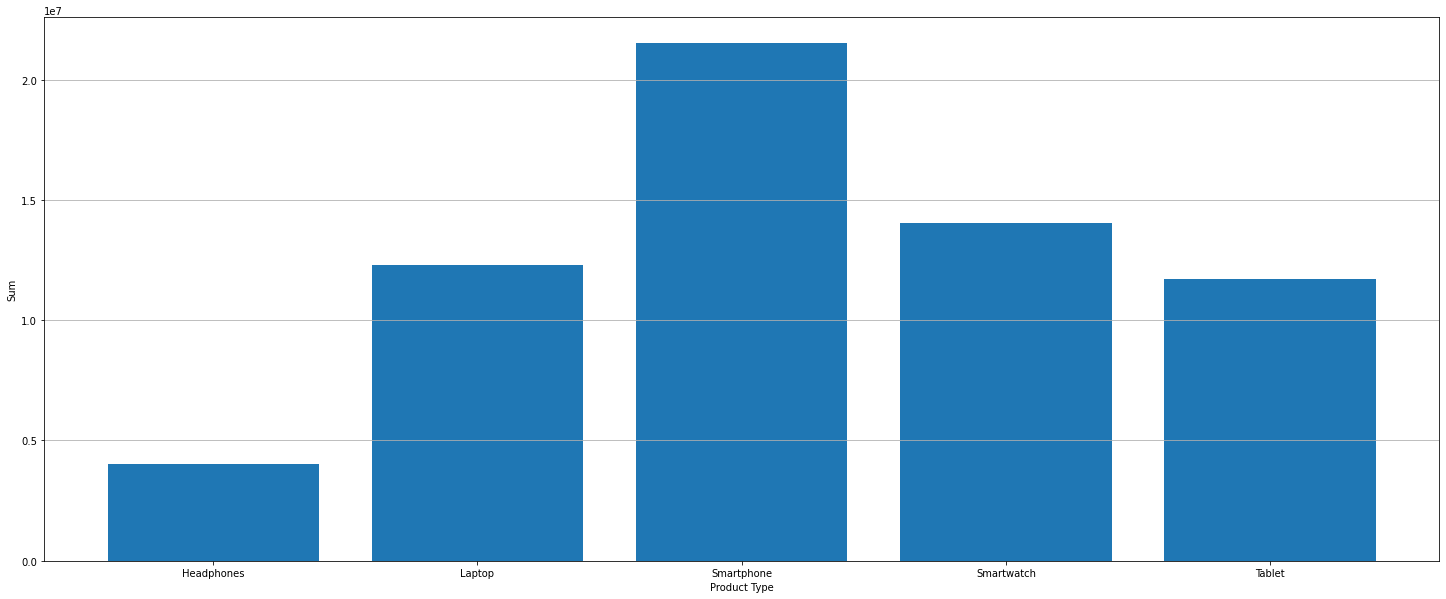

,Product Type,Total Price
0,Headphones,4041400.24
1,Laptop,12296239.97
2,Smartphone,21516754.69
3,Smartwatch,14036273.06
4,Tablet,11712000.41


In [302]:
#Доход по методу доставки
product_type = df.groupby('Product Type').agg({'Total Price': 'sum'})
product_type = product_type.reset_index()

fig, ax = plt.subplots(figsize=(25,10))
ax.bar(product_type['Product Type'],product_type['Total Price'])
ax.grid(axis = 'y')
ax.set_xlabel('Product Type')
ax.set_ylabel('Sum')
plt.show()

product_type
#df = sum_total_shipping.merge(df, on = 'Customer ID')

<ipython-input-306-88381a5fee00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  addons_sum['Purchase Month'] = addons_sum['Purchase Date'].apply(convert_date)


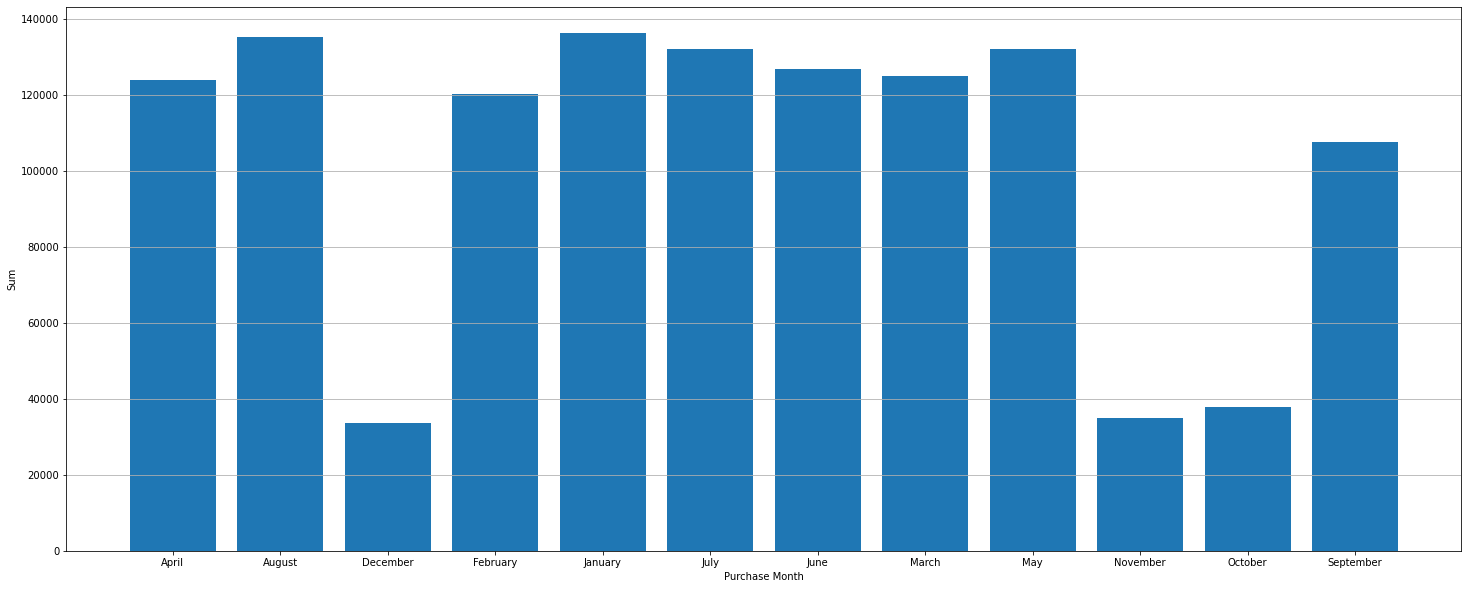

,Purchase Month,Add-on Total
0,April,123973.59
1,August,135133.14
2,December,33509.15
3,February,120148.92
4,January,136195.16
5,July,132017.20
6,June,126689.59
7,March,124954.26
8,May,132018.51
9,November,34888.81


In [306]:
#Доход от доп услуг по месяцам
addons_sum = df.dropna(subset=['Add-ons Purchased'])

def convert_date(row):
    date_obj = datetime.strptime(row, '%Y-%m-%d')
    return date_obj.strftime('%B')


addons_sum['Purchase Month'] = addons_sum['Purchase Date'].apply(convert_date)
addons_sum = addons_sum.groupby('Purchase Month').agg({'Add-on Total': 'sum'})
addons_sum = addons_sum.reset_index()

fig, ax = plt.subplots(figsize=(25,10))
ax.bar(addons_sum['Purchase Month'],addons_sum['Add-on Total'])
ax.grid(axis = 'y')
ax.set_xlabel('Purchase Month')
ax.set_ylabel('Sum')
plt.show()

addons_sum

<ipython-input-307-862c518bd042>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  addons_sum['Purchase Quarter'] = addons_sum['Purchase Date'].apply(convert_date)


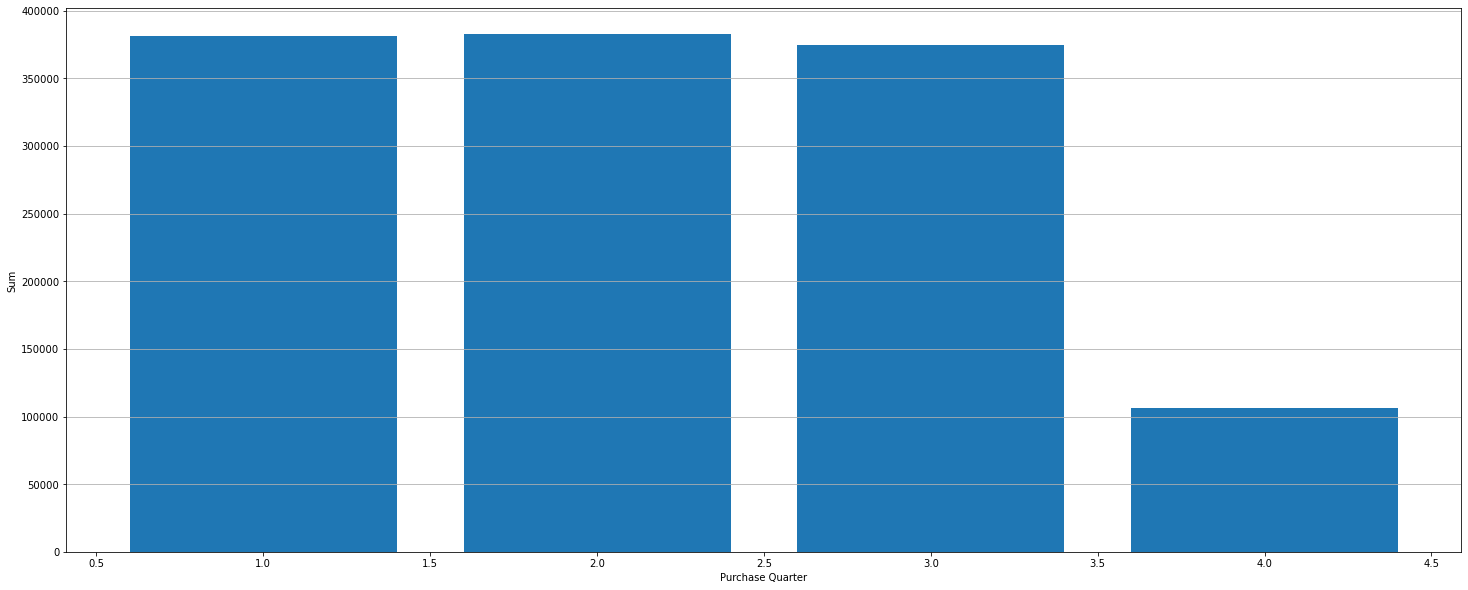

,Purchase Quarter,Add-on Total
0,1,381298.34
1,2,382681.69
2,3,374681.85
3,4,106235.08


In [307]:
#Доход по доп услугам за квартал
#Доход от доп услуг по месяцам
addons_sum = df.dropna(subset=['Add-ons Purchased'])

def convert_date(row):
    date_obj = datetime.strptime(row, '%Y-%m-%d')
    quarter = (date_obj.month - 1) // 3 + 1
    return quarter


addons_sum['Purchase Quarter'] = addons_sum['Purchase Date'].apply(convert_date)
addons_sum = addons_sum.groupby('Purchase Quarter').agg({'Add-on Total': 'sum'})
addons_sum = addons_sum.reset_index()

fig, ax = plt.subplots(figsize=(25,10))
ax.bar(addons_sum['Purchase Quarter'],addons_sum['Add-on Total'])
ax.grid(axis = 'y')
ax.set_xlabel('Purchase Quarter')
ax.set_ylabel('Sum')
plt.show()

addons_sum